# Visualisaing sample data with GeoPandas

In [67]:
import geopandas as gpd
import geodatasets

In [52]:
nybb = gpd.read_file(get_path("nybb"))
nybb

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [16]:
import matplotlib.pyplot as plt

<Axes: >

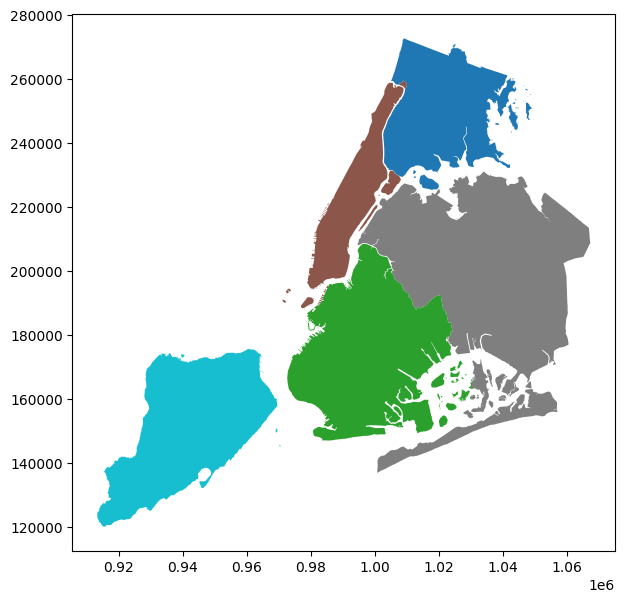

In [53]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
nybb.plot(ax=ax, column = 'BoroName', linewidth = 1.5, cmap = 'tab10')

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

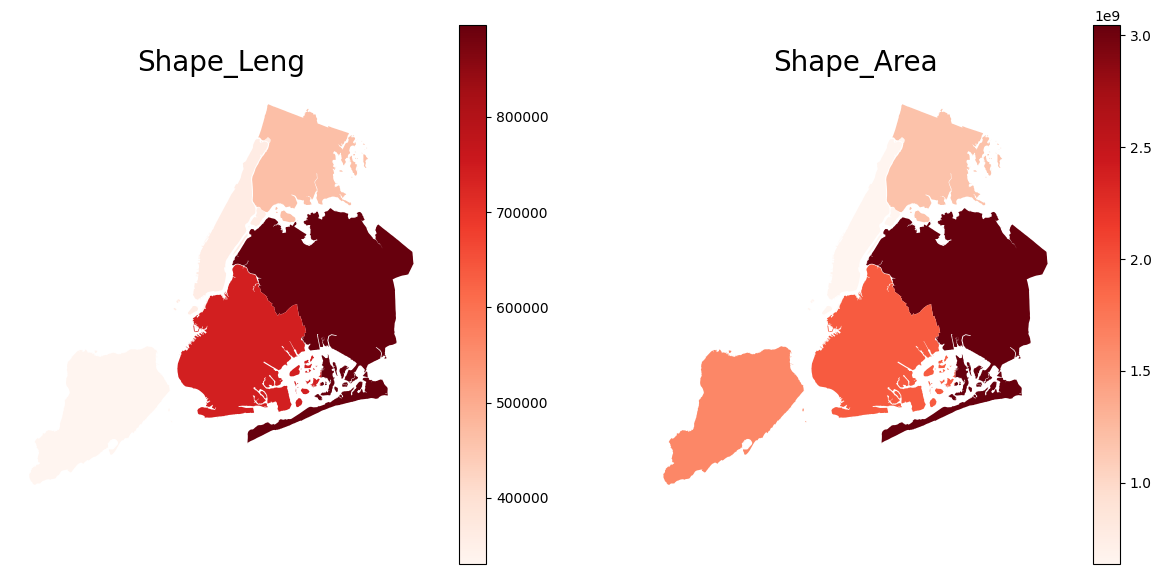

In [54]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
nybb.plot(ax = ax[0], column = 'Shape_Leng', cmap = 'Reds', legend = True)
nybb.plot(ax = ax[1], column = 'Shape_Area', cmap = 'Reds', legend = True)

ax[0].set_title('Shape_Leng', fontsize = 20, pad = 10)
ax[1].set_title('Shape_Area', fontsize = 20, pad = 10)

ax[0].axis('off')
ax[1].axis('off')

# Map projections

In [71]:
world = gpd.read_file(get_path("naturalearth.land"))
world

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...,...
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.7562,..."
124,Land,0,0.0,"POLYGON ((-87.02 79.66, -85.81435 79.3369, -87..."
125,Land,0,0.0,"POLYGON ((-68.5 83.10632, -65.82735 83.02801, ..."


In [75]:
print(nybb.crs)
print(world.crs)

EPSG:2263
EPSG:4326


In [77]:
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [78]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [79]:
world_nyc = world.to_crs('2263')

In [80]:
print(world_nyc.crs)

EPSG:2263


<Axes: >

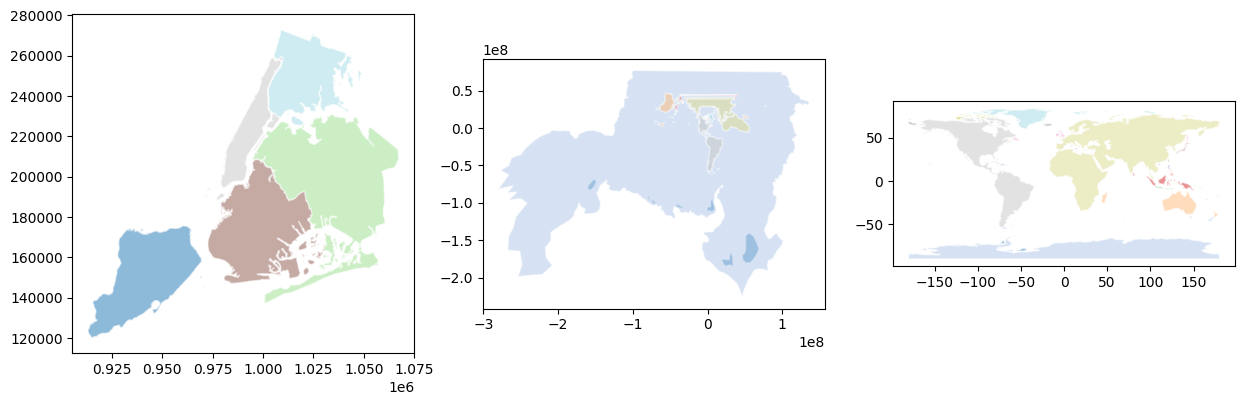

In [84]:
f, ax = plt.subplots(1, 3, figsize = (15, 7))

nybb.plot(ax = ax[0], edgecolor = 'w', cmap = 'tab20', alpha = 0.5, linewidth = 1)
world_nyc.plot(ax = ax[1], edgecolor = 'w', cmap = 'tab20', alpha = 0.5, linewidth = 1)
world.plot(ax = ax[2], edgecolor = 'w', cmap = 'tab20', alpha = 0.5, linewidth = 1)